#Fashion MNIST Clothing Classifier using CNN (TensorFlow/Keras)
Author: Gorachand Mondal  
GitHub: https://github.com/Gorachand2501/fashion-mnist-classifier

In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


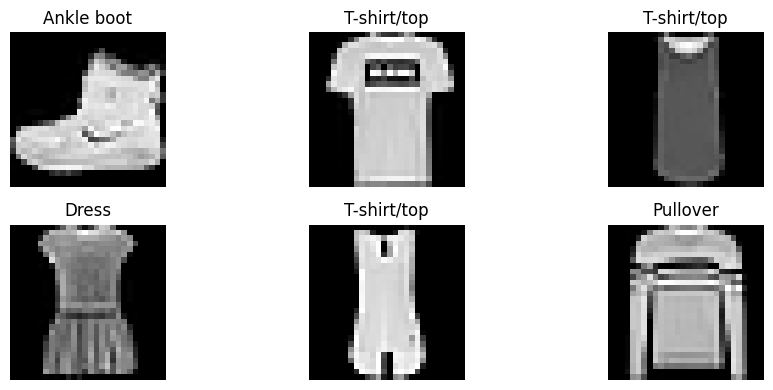

In [2]:
# Load and Visualize Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show sample images
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
# Preprocess Data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., None]  # Add channel dimension
x_test = x_test[..., None]

In [4]:
# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the Model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.6906 - loss: 0.8706 - val_accuracy: 0.8556 - val_loss: 0.3969
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.8392 - loss: 0.4363 - val_accuracy: 0.8708 - val_loss: 0.3488
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.8620 - loss: 0.3781 - val_accuracy: 0.8810 - val_loss: 0.3142
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.8777 - loss: 0.3376 - val_accuracy: 0.8843 - val_loss: 0.3027
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.8844 - loss: 0.3157 - val_accuracy: 0.8984 - val_loss: 0.2729
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.8928 - loss: 0.2921 - val_accuracy: 0.8974 - val_loss: 0.2751
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.9032 - loss: 0.2642 - val_accuracy: 0.8992 - val_loss: 0.2712
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 66ms/step - accuracy: 0.9045 - loss: 0.2605 - 

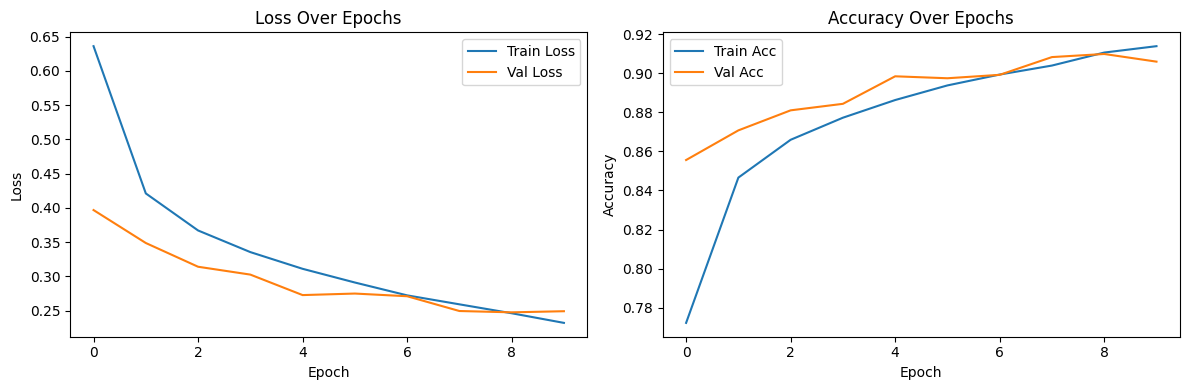

In [7]:
# Plot Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8994 - loss: 0.2726

✅ Test Accuracy: 90.09%


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


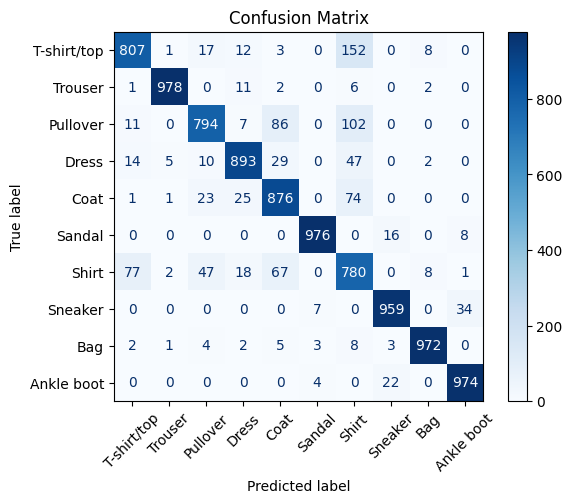

In [9]:
# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [10]:
# Save the Model
model.save("fashion_mnist_cnn.h5")
print("✅ Model saved as 'fashion_mnist_cnn.h5'")

✅ Model saved as 'fashion_mnist_cnn.h5'
